# A end-to-end data science project 

Data science is an area that is commonly described as the **intersection of statistics/mathematics, computing and knowledge about the domain of the problem to be solved**. 

Therefore, one of the most interesting ways to have a first contact with the area or to develop a project to put in the personal portfolio is to work with the so-called **end-to-end solutions**, which cover from the first stages of the pipeline to the final one. The pipeline of a data science project can be, in a simple way, represented as:

![](https://i.imgur.com/ktXs0XP.png)

So, my name is [Wesley Alves](https://www.linkedin.com/in/w-alves/) and in this kernel, we will take a tour and discuss concepts of the three areas that make up data science and we will also cover the entire pipeline of tasks that are usually carried out in the **daily life of a professional**. 

Making a brief summary, in this project you will learn about:

- 🧠 **Problem understanding**
- 🔎 **Sampling**
- 🎲 **Data wrangling**  
- 📊 **Data visualization**
- 🤔 **Hypothesis tests**
- 🤖 **AutoML with PyCaret**                 
- 🐱 **CatBoost algorithm**                    
- 📈 **Evaluation metrics for regression**   
- 🧐 **Interpretability with SHAP**          

There are several problems that could serve as a basis for building this project. Here, a special was chosen, to take a look, **imagine that the CEO of your company come and tell to you the following**:

>"Hey, I was traveling on the web and find a kind of "brazilian SAT", called ENEM. After read more about it, I was wondering if we can take some insights of the data provided by the test organizers and and perhaps create some solution that will help the students to plan which colleges they want to apply to before they even have the official score. What do you think?"

As a person who had long sought an opportunity to explore this area of **data and analytics**, you accept the "challenge" and decide first to try to better understand the problem. So, let's go!

## Problem understanding

The **ENEM(National High School Exam, in english) is a test** carried out by the INEP(National Institute of Educational Studies and Research Anísio Teixeira, in english), an agency linked to the Ministry of Education of Brazil, and was created in 1998. It is used to assess the quality of high school in the country and to **admission to universities**. This test can be separated in the **objective part** (represented by the questions to mark on the four areas of knowledge) and in the **part of the essay** (where the student has to expatiate on a determined theme).

**In the objective part, the score is calculated using a mathematical model of Item Response Theory (IRT)**, in which each question is an item. This theory considers the consistency of the answer to calculate the grade according to the degree of difficulty of each question. On the other hand, **the essay part is corrected manually by a team of teachers trained for this by INEP itself.**

Thus, an way to help the students to plan wich colleges they want to apply is trying to **estimate the official score given the number of right answers in the exam**.  To make this estimation, we could try to manually build a formula for this task but it is much more interesting to automate this using some **machine learning model**. This allows us to understand **patterns and connections between the data** that in a personal analysis would be hidden, thus enhancing the results achieved.

An important detail to be said is that as the IRT exists and as the test is different every year, it is natural that **there is a small difference in scores in each year** (there are years that the math average comes a little lower, others comes a little higher , etc). With this, it is important to emphasize that we will have **limitations regarding the accuracy of our model**, since we will always have access to data only from the previous one. A better way to generalize would be to **work with all datasets from, say, the last 5 years**, but here we are not going to do that since the ends are merely **didactic**.

After this prior analysis, we are now able to start in fact to develop our solution.

## General set-up

First of all, let's make the necessary **imports**.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sct
import statsmodels.api as sm
from pycaret.regression import *

In [2]:
pd.set_option('mode.chained_assignment', None)

In [3]:
sns.set_style('whitegrid')

Instead of loading the entire dataset, here in this project we will choose to work with a **small group of observations** within this dataset, this will **allow us to exercise/learn important concepts** that will have contact with as a data scientist, such as **hypothesis tests** and **sampling**. 

Already starting to talk about sample, we can say that it is thanks to this idea we were able to do, for example, electoral polls, opinion polls and to **estimate the final result with good precision even when talking to a very small group of people**.  Sampling is the **opposite of the census approach**. The census in turn is a process that consists of examining all elements of the population.

![](https://i.imgur.com/nshe62j.png)

In order to obtain accurate statistics but without necessarily having to carry out the process mentioned above, a concept is important and it is it that basically guides the sampling task: **randomness**. When we randomly select a specific number of individuals from a population, we can make this sample **representative**, that is, we can make this subgroup accurately represent the general characteristics.

There are many methods of sampling, but here we will use the **Simple Random Sample**. In this method, **any group of n individuals is equally likely to be selected from an N population.**

A very important factor to be considered when talking about sampling is the **sample size**, in other words, how many people do we need to represent the entire population well? To calculate this value, there is a **formula** and with it we can decide the size so that we have the **level of confidence** and the desired **margin of error**.

The **margin of error** is an index that estimates the **maximum error of the search result based on the selected sample**. **Confidence level** indicates the **probability** that if the survey is applied to another group of people, and within the same sample data with the same error range, then the survey will get the **same result**.

The formula to calculate the sample size is:

![](https://i.imgur.com/dm6Jd7V.png)

Where $N$ = population size, $e$ = margin of error (percentage in decimal format), $p$ = sample proportion , $z$ = z-score

> The z score is chosen based on the desired confidence level, see the table below. 

![](https://i.imgur.com/aHku0CM.png)


Here for our problem, we will choose the **desired 95% confidence level** and **0.5% for the desired margin of error**. Furthermore, as we are going to analyze several things and not a specific effect, it is legal that we choose a **conservative value for p**, such as 50%, which in turn gives us the **largest sample size**.

So, here in our case we have: 

![](https://i.imgur.com/LPjZCY6.png)


As in the future we will probably have to **remove some lines that do not add up for our analysis**, we will now select a **larger sample** with with an approximate size of 0.011% of our population in order to subsequently **maintain this minimum value of 38129 observations.**

In [32]:
np.random.seed(777)

In [33]:
df = pd.read_csv(
    'data/MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    sep=';',
    skiprows=lambda i: i>0 and np.random.rand() > 0.011,
)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004712,2019,1500800,Ananindeua,15,PA,22,F,0,1,1,1500800.0,Ananindeua,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1500800,Ananindeua,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,D,E,B,5,D,A,D,E,B,A,B,A,B,A,B,A,A,B,A,A,E,A,D,B
1,190001004793,2019,1506807,Santarém,15,PA,16,M,1,0,1,1506807.0,Santarém,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,647.8,661.5,690.0,703.2,DADACEABCCCCBABBCEABCACDEACEEBAABEEAEADEADAEE,EEBCEEABADBCABABCAABCEBACDBBABCACACCAADEBBDAB,ADBBE99999ABBCBCDAAECDDDBAAAECADACDCAEDECAECBD...,DEEBABCACDAACEBEAEBBBAEDDDCBAABBABCBCEBDBADCE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,200.0,200.0,180.0,180.0,160.0,920.0,F,G,D,D,7,I,A,E,E,C,A,D,D,B,B,A,A,A,E,B,B,E,A,D,B
2,190001004796,2019,1501402,Belém,15,PA,24,F,1,2,1,1501402.0,Belém,15.0,PA,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,506.0,508.0,512.0,517.0,378.9,465.0,541.3,433.9,BDEDCAAEDBDCBEADABEACBDBDDACAEBECADBADACAEDBC,AECACBAECDCEACABDCEEBBDCEACEACCBEDEACDECAEDBC,99999DEDCACBCBAEDCCBCADCADAABEEAEBDABDBEECBEAA...,DCCBCAECBADEACBBDCAEDBCACECCADAECBAACDEBDBDAE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,80.0,120.0,80.0,520.0,D,D,B,B,2,B,A,B,A,A,A,B,A,B,B,A,A,A,B,A,A,C,A,A,B
3,190001004924,2019,1502939,Dom Eliseu,15,PA,20,M,1,3,1,1502939.0,Dom Eliseu,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [34]:
df.shape

(56058, 136)

## Data Wrangling

**NOTE**: Before starting this step, I strongly recommend that you do a brief reading of the features dictionary in this dataset. In case you didn't want to download the entire dataset file to have access to this document, I [uploaded it here](https://drive.google.com/file/d/17OujnKvwyRpx87IkHVJT7tXJP7RKOOZA/view?usp=sharing) and you can make the necessary queries.

As the idea with this model is to allow students to **estimate their scores before the official result get published**, we will use the **number of correct answers** for each area of knowledge to generate the predictions. 

Unfortunately, the dataset does not have information on the number of right answers per registered area, but it has the columns ```TX_RESPOSTAS_<KNOWLEDGE AREA>``` and ```TX_GABARITO_<KNOWLEDGE AREA>```. These two columns contains, respectively, a vector with all the answers of the student and the right answer.

We also need the features that contains the **scores of the objective test** to use as target, so we can use the columns wich contain these scores for each knowledge area. 
* NU_NOTA_LC = Languages and Codes scores 
* NU_NOTA_CH = Human Sciences scores 
* NU_NOTA_CN = Natural Sciences scores 
* NU_NOTA_MT = Mathematics scores

Finally, in order to check the answers correctly in the language test, we need the column ```TP_LINGUA``` that informs about the **foreign language chosen by the student**.

In [35]:
answers = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']
correct_answers = ['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']
scores = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
foreign_language = ['TP_LINGUA']
subset = df[['NU_INSCRICAO']+foreign_language+answers+correct_answers+scores]

In [36]:
subset.head()

,NU_INSCRICAO,TP_LINGUA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,190001004712,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,190001004793,0,DADACEABCCCCBABBCEABCACDEACEEBAABEEAEADEADAEE,EEBCEEABADBCABABCAABCEBACDBBABCACACCAADEBBDAB,ADBBE99999ABBCBCDAAECDDDBAAAECADACDCAEDECAECBD...,DEEBABCACDAACEBEAEBBBAEDDDCBAABBABCBCEBDBADCE,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,647.8,661.5,690.0,703.2
2,190001004796,1,BDEDCAAEDBDCBEADABEACBDBDDACAEBECADBADACAEDBC,AECACBAECDCEACABDCEEBBDCEACEACCBEDEACDECAEDBC,99999DEDCACBCBAEDCCBCADCADAABEEAEBDABDBEECBEAA...,DCCBCAECBADEACBBDCAEDBCACECCADAECBAACDEBDBDAE,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,378.9,465.0,541.3,433.9
3,190001004924,1,DCBCAEBABDCCACACDDBCBABDEEBAABCDBEEEACBDEBDDB,AEACEEDBACEDABCADBAAECEABDBECAAECECAAAEEABEEE,99999EBBCABBCCBBAEEEEDDEBAAAECAEABBDDEBEBCAECB...,BCABACBBCAABBBAAAAAAAAABBBDBBCBBBAAAACCAAAAAB,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,443.9,529.1,508.9,497.6
4,190001004930,0,BBCDDDCCECBCCCDBCDBAEEDCEEACEDDBECBDCBDEDCEDA,CCECEAECABAECDCBEACEBBDEBECAEADABBDDEEDDDEBBD,CBDAE99999BAEDCEBDABAADDDDDCDECAAEAEECCAAECCCC...,EBBADDECCDECBADEDCCDCDCBACDBDEEBDDDCBCBBDBDDB,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,506.5,544.1,558.6,469.1


We will quickly check for the **existence of null values** in these selected columns.

In [37]:
subset.isna().sum()

NU_INSCRICAO           0
TP_LINGUA              0
TX_RESPOSTAS_CN    14964
TX_RESPOSTAS_CH    12773
TX_RESPOSTAS_LC    12773
TX_RESPOSTAS_MT    14964
TX_GABARITO_CN     14964
TX_GABARITO_CH     12773
TX_GABARITO_LC     12773
TX_GABARITO_MT     14964
NU_NOTA_CN         14964
NU_NOTA_CH         12773
NU_NOTA_LC         12773
NU_NOTA_MT         14964
dtype: int64

In [38]:
subset.dropna().shape[0]

41009

As can be seen, we have **several rows with missing values** in the different columns. To deal with this problem, here we are simply going to **remove them from the subset because there are still 41k samples left, more than the minimum for our desired confidence level and margin of error.**

In [39]:
subset = subset.dropna()

Looking at the **features dictionary** provided by INEP, we can see that, in the answer vectors of the language test, there is the sequence of numbers 99999 that represents the foreign language questions **not chosen by the student**.

In order to be able to compare with the correct answers in the future, we will remove this sequence from the vector.

In [40]:
subset['TX_RESPOSTAS_LC'] = subset['TX_RESPOSTAS_LC'].str.replace('9', '')

Now, let's **adjust** the language test answer vectors.

Originally, these vectors have **50 elements** because they have both the answers to the 5 questions in English and the 5 questions in Spanish. However, as each student takes only one of the tests, **we can remove the interval corresponding to the portion of the test that was not taken**.

**In ENEM, the first 5 questions are in English and questions 6-10 are in Spanish. So, based on the TP_LINGUA column, we will perform this removal.**

In [41]:
subset.loc[subset.TP_LINGUA == 0, 'TX_GABARITO_LC'] = subset.query('TP_LINGUA ==0')['TX_GABARITO_LC'].str.slice(stop=5)+subset['TX_GABARITO_LC'].str.slice(start=10)

In [42]:
subset.loc[subset.TP_LINGUA == 1, 'TX_GABARITO_LC'] = subset['TX_GABARITO_LC'].str.slice(start=5)

We are going now to calculate **how many answers are correct in each area of knowledge**. To do this, simply transform the vectors that are in string format into an np.array and perform the sum of the new binary array generated after the comparison

In [43]:
subset['ACERTOS_CN'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_CN'])) == np.array(list(x['TX_GABARITO_CN']))), axis=1)
subset['ACERTOS_CH'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_CH'])) == np.array(list(x['TX_GABARITO_CH']))), axis=1)
subset['ACERTOS_LC'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_LC'])) == np.array(list(x['TX_GABARITO_LC']))), axis=1)
subset['ACERTOS_MT'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_MT'])) == np.array(list(x['TX_GABARITO_MT']))), axis=1)

We now have an **important decision** to make that will directly impact the modeling phase: should we perform a **univariate regression** or a **multivariate regression**? In other words, do we want to use the number of correct answers to predict only the score corresponding to the respective area of knowledge or do we want to use the correctness quantities to predict the value of the sum of these scores?

Well, to make this decision I think it's important to remember that **ENEM uses the Index Response Theory model**. Thus, **performing a multivariate regression presents itself as an interesting hypothesis because we were able to somehow simulate an effect of the IRT in the notes**, since the model would have access to the number of correct answers in all areas at the same time.

Given the above, we will **create a new feature with the sum of the objective notes** and remove the individual columns.

In [44]:
subset['SOMA_NOTAS_OBJ'] = subset[scores].sum(axis=1)

In [45]:
subset = subset.drop(columns=foreign_language+answers+correct_answers)

In [46]:
hits = ['ACERTOS_CN', 'ACERTOS_CH', 'ACERTOS_LC', 'ACERTOS_MT']
subset = subset[['NU_INSCRICAO'] + hits + ['SOMA_NOTAS_OBJ']]
subset = subset.set_index('NU_INSCRICAO')
subset.head()

,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,SOMA_NOTAS_OBJ
NU_INSCRICAO,,,,,
190001004793,27,34,40,18,2702.5
190001004796,9,11,20,8,1819.1
190001004924,12,15,16,11,1979.5
190001004930,11,18,24,10,2078.3
190001005196,6,13,17,13,1856.8


The next step is the exploration/visualization, so let's **merge** our original dataset with the subset, so we can **incorporate the new information** created and don't be worried about the null values, as we remove them in the subset.

In [47]:
df = df.set_index('NU_INSCRICAO')
df_dataviz = pd.merge(df, subset, left_index=True, right_index=True)

Here, we will create a column with the **general average of the scores**.

In [48]:
df_dataviz['NOTA_GERAL'] = df_dataviz[['SOMA_NOTAS_OBJ','NU_NOTA_REDACAO']].sum(axis=1)/5

In order to make the dataframe more presentable and facilitate the data exploration stage, we will **replace the values** in the columns in order to leave the meaning **self-explainable**. This relationship was taken from **INEP's feature dictionary**.

So again, I recommend that you read this file if you haven't already.

In [49]:
df_dataviz['TP_SEXO'].replace({'M': 'Male',
                               'F': 'Female'}, inplace=True)

In [50]:
df_dataviz['TP_COR_RACA'].replace({0:'Not declared',
                                   1:'White',
                                   2:'Black',
                                   3:'Brown',
                                   4:'Yellow',
                                   5:'Indigenous'}, inplace=True)

In [51]:
df_dataviz['Q001'].replace({'A': 'Never studied',
                            'B': 'Incomplete elementary',
                            'C': 'Complete elmentary', 
                            'D': 'Incomplete high school',
                            'E': 'Complete high school',
                            'F': 'Complete higher education',
                            'G': 'Complete postgraduate',
                            'H': "Don't know"}, inplace=True)

In [52]:
df_dataviz['Q002'].replace({'A': 'Never studied',
                            'B': 'Incomplete elementary',
                            'C': 'Complete elmentary', 
                            'D': 'Incomplete high school',
                            'E': 'Complete high school',
                            'F': 'Complete higher education',
                            'G': 'Complete postgraduate',
                            'H': "Don't know"}, inplace=True)

In [53]:
df_dataviz.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,SOMA_NOTAS_OBJ,NOTA_GERAL
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
190001004793,2019,1506807,Santarém,15,PA,16,Male,1,Not declared,1,1506807.0,Santarém,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,647.8,661.5,690.0,703.2,DADACEABCCCCBABBCEABCACDEACEEBAABEEAEADEADAEE,EEBCEEABADBCABABCAABCEBACDBBABCACACCAADEBBDAB,ADBBE99999ABBCBCDAAECDDDBAAAECADACDCAEDECAECBD...,DEEBABCACDAACEBEAEBBBAEDDDCBAABBABCBCEBDBADCE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,200.0,200.0,180.0,180.0,160.0,920.0,Complete higher education,Complete postgraduate,D,D,7,I,A,E,E,C,A,D,D,B,B,A,A,A,E,B,B,E,A,D,B,27,34,40,18,2702.5,724.50
190001004796,2019,1501402,Belém,15,PA,24,Female,1,Black,1,1501402.0,Belém,15.0,PA,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,506.0,508.0,512.0,517.0,378.9,465.0,541.3,433.9,BDEDCAAEDBDCBEADABEACBDBDDACAEBECADBADACAEDBC,AECACBAECDCEACABDCEEBBDCEACEACCBEDEACDECAEDBC,99999DEDCACBCBAEDCCBCADCADAABEEAEBDABDBEECBEAA...,DCCBCAECBADEACBBDCAEDBCACECCADAECBAACDEBDBDAE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,80.0,120.0,80.0,520.0,Incomplete high school,Incomplete high school,B,B,2,B,A,B,A,A,A,B,A,B,B,A,A,A,B,A,A,C,A,A,B,9,11,20,8,1819.1,467.82
190001004924,2019,1502939,Dom Eliseu,15,PA,20,Male,1,Brown,1,1502939.0,Dom Eliseu,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Thinking about the next stage, I think it will be cool to plot a **map of Brazil**. So, here we will use the **geopandas** library to read the **geospatial data** of Brazil (which you can download [here](https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg)) and make the necessary manipulations in order to obtain a new dataframe with the state, its respective mean of scores and its respective geometry.

In [54]:
INFO_UFS = gpd.read_file('data/bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

INFO_UFS.rename({'sigla': 'state'}, axis=1, inplace=True)
enem_df = df_dataviz.rename({'SG_UF_RESIDENCIA': 'state'}, axis=1)

enem_df = enem_df.groupby(by='state').mean()

BRAZIL = INFO_UFS.merge(enem_df, on='state', how='left')

BRAZIL[['state', 'NOTA_GERAL', 'geometry']].head()

,state,NOTA_GERAL,geometry
0,GO,520.236947,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,520.508935,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,535.063571,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,541.375595,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,510.478542,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


## Data Exploration and Visualization

Now it's time to **explore** and, most importantly, **visualize** our data.

Before it, I would like to emphasize that it is important to keep in mind that **a data science pipeline is not one-sided**: we constantly go back to steps to make small or large changes that were only brought about by an insight from a later step. Thus, it is natural that we do some data manipulation here at this stage.

Well, a important task in a data scientist's daily life is to work with visualization, by doing this we can **understand the data faster and more correctly**. 

One of the most consolidated examples of the importance of this activity is the famous **Ascomb Quartet**, in this example it is clear that the **numbers can be incredibly misleading**. The quartet in question is a set of four data samples that, despite having exactly the **same mean, variance, correlation and linear regression**, represent **completely different distributions of the data**.

![](https://www.researchgate.net/profile/Arch_Woodside2/publication/285672900/figure/fig4/AS:305089983074309@1449750528742/Anscombes-quartet-of-different-XY-plots-of-four-data-sets-having-identical-averages.png)



Let's plot the **distribution of scores for each area of knowledge.**

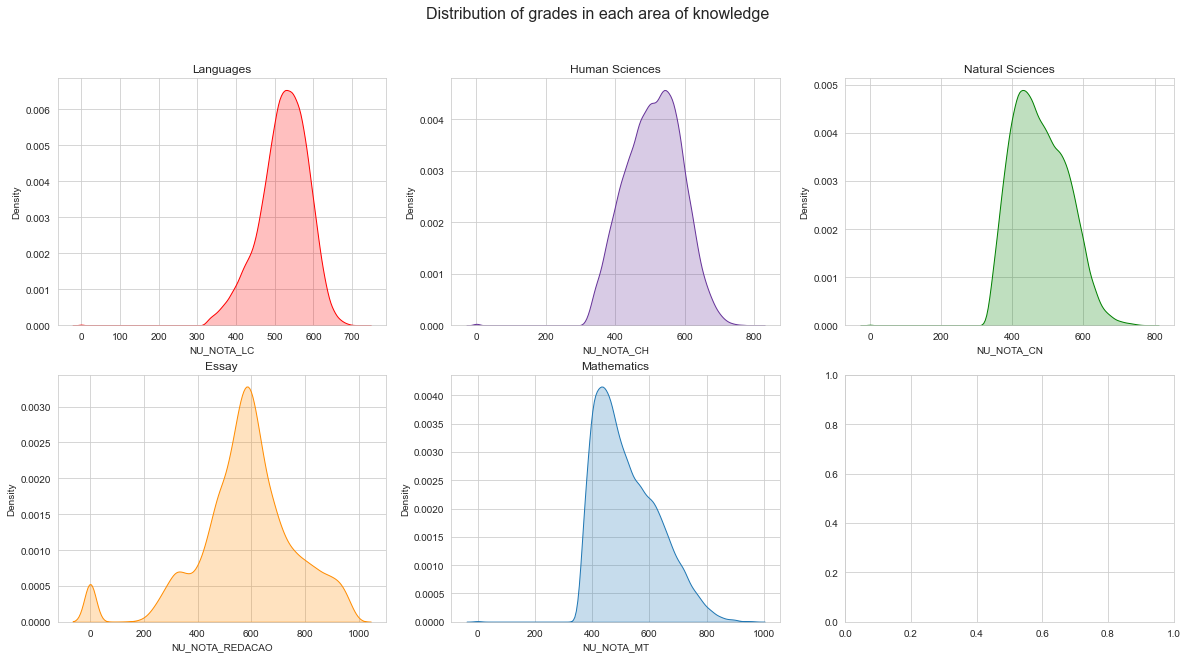

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(df_dataviz['NU_NOTA_LC'], ax = axes[0, 0], shade=True, color='r')
sns.kdeplot(df_dataviz['NU_NOTA_CH'], ax = axes[0, 1], shade=True, color='rebeccapurple')
sns.kdeplot(df_dataviz['NU_NOTA_CN'], ax = axes[0, 2], shade=True, color='g')
sns.kdeplot(df_dataviz['NU_NOTA_REDACAO'], ax = axes[1, 0], shade=True, color='darkorange')
sns.kdeplot(df_dataviz['NU_NOTA_MT'], ax = axes[1, 1], shade=True)

fig.suptitle('Distribution of grades in each area of knowledge', fontsize=16)
axes[0, 0].set_title('Languages')
axes[0, 1].set_title('Human Sciences')
axes[0, 2].set_title('Natural Sciences')
axes[1, 0].set_title('Essay')
axes[1, 1].set_title('Mathematics')

plt.show()

**Do these distributions make sense?**

Yes. Here we can realize a **negative skewness** of Languagens and of Human Sciences, that are commonly recognized for having the **easiest questions** and a **positive skewness** of Nature Sciences and Math, that are commonly recognized for having the **hardest questions**.

However, **something seems wrong**... If there were no values equal to zero in the objective test scores, Seaborn would **automatically** plot the graph with the x-axis starting from a non-zero value, this is what we call as **outliers**. A outilier is an observation that presents a great departure from the rest of the series, or that is inconsistent. The existence of outliers typically implies losses in the interpretation of the results of the statistical tests applied to the samples.

To release conscience, let's **remove these values** of ours dataframe and plot the distribution again.

In [56]:
df_dataviz = df_dataviz[(df_dataviz['NU_NOTA_LC'] != 0) &
                        (df_dataviz['NU_NOTA_CH'] != 0) & 
                        (df_dataviz['NU_NOTA_CN'] != 0) &
                        (df_dataviz['NU_NOTA_MT'] != 0)]

In [57]:
subset = subset.reindex(df_dataviz.index)

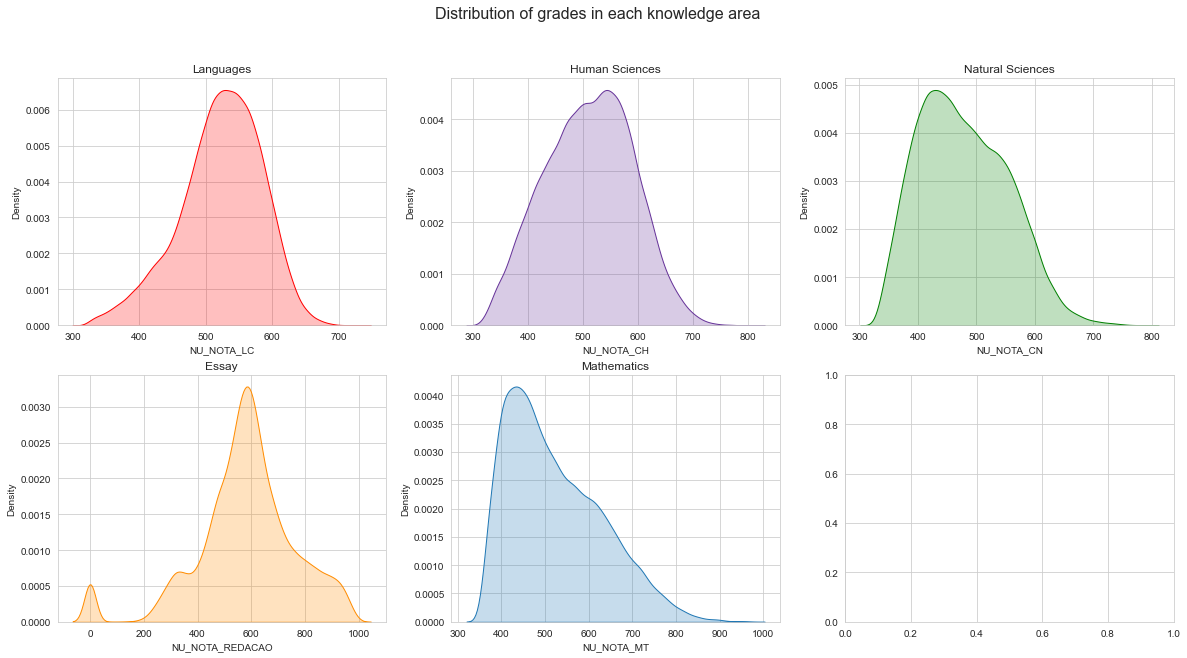

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(df_dataviz['NU_NOTA_LC'], ax = axes[0, 0], shade=True, color='r')
sns.kdeplot(df_dataviz['NU_NOTA_CH'], ax = axes[0, 1], shade=True, color='rebeccapurple')
sns.kdeplot(df_dataviz['NU_NOTA_CN'], ax = axes[0, 2], shade=True, color='g')
sns.kdeplot(df_dataviz['NU_NOTA_REDACAO'], ax = axes[1, 0], shade=True, color='darkorange')
sns.kdeplot(df_dataviz['NU_NOTA_MT'], ax = axes[1, 1], shade=True)

fig.suptitle('Distribution of grades in each knowledge area', fontsize=16)
axes[0, 0].set_title('Languages')
axes[0, 1].set_title('Human Sciences')
axes[0, 2].set_title('Natural Sciences')
axes[1, 0].set_title('Essay')
axes[1, 1].set_title('Mathematics')

plt.show()

Now everything sounds right! It is clear the **effective presence of the Item Response Theory (IRT) in the correction of objective questions**, for which it is impossible for students to get a zero score, even if they miss all questions. In the essay, this does not occur for example, since their correction is done manually by professors.

Another interesting way to visualize this effect of the IRT on the score is to **analyze the range of notes for each number of correct answers.**

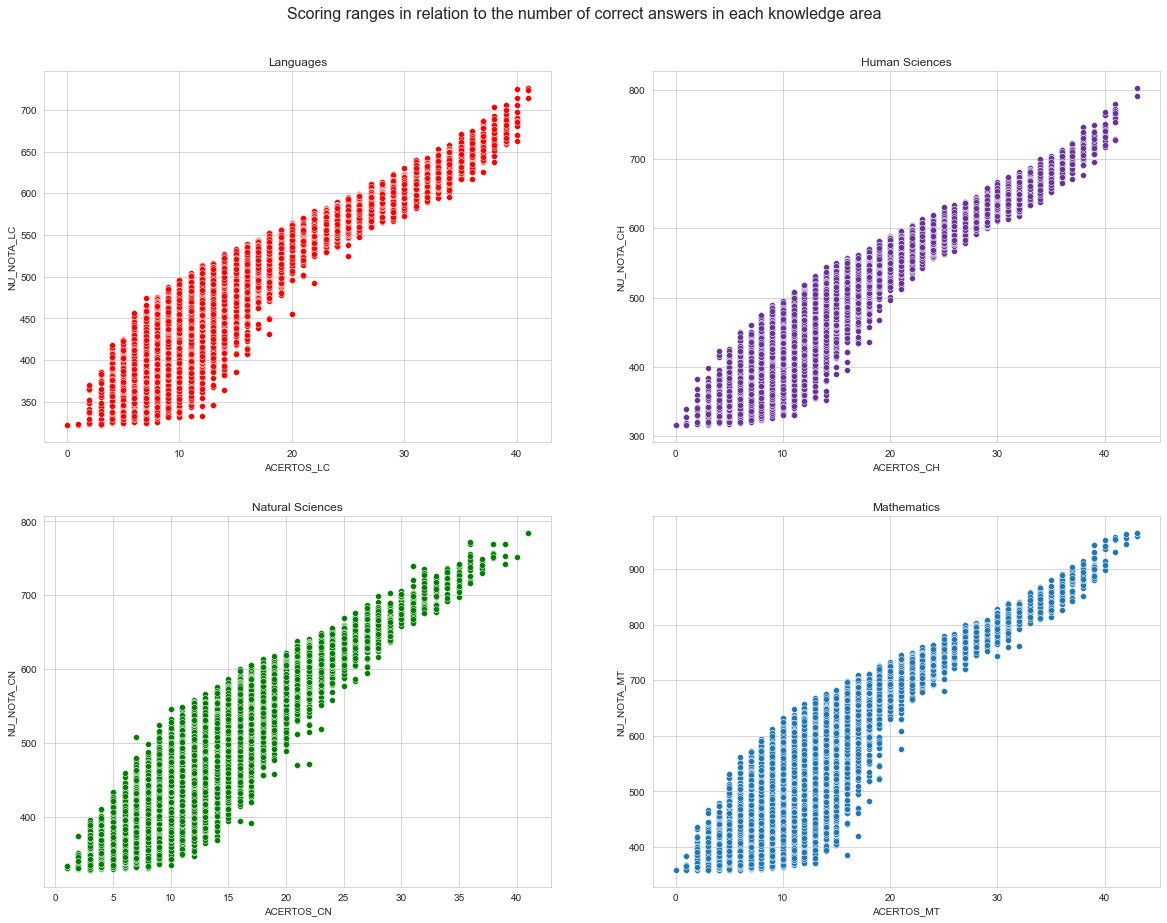

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.scatterplot(x=df_dataviz['ACERTOS_LC'], y=df_dataviz['NU_NOTA_LC'], ax=axes[0,0], color='r')
sns.scatterplot(x=df_dataviz['ACERTOS_CH'], y=df_dataviz['NU_NOTA_CH'], ax=axes[0,1], color='rebeccapurple')
sns.scatterplot(x=df_dataviz['ACERTOS_CN'], y=df_dataviz['NU_NOTA_CN'], ax=axes[1,0], color='g')
sns.scatterplot(x=df_dataviz['ACERTOS_MT'], y=df_dataviz['NU_NOTA_MT'], ax=axes[1,1])

fig.suptitle('Scoring ranges in relation to the number of correct answers in each knowledge area', fontsize=16, y = 0.94)
axes[0,0].set_title('Languages')
axes[0,1].set_title('Human Sciences')
axes[1,0].set_title('Natural Sciences')
axes[1,1].set_title('Mathematics')

plt.show()

As we can see, there are **several different scores possibilities for people with the same amount of correctness**. In mathematics, for example, there are people with 10 correct answers that scored close to 380 and people with 10 correct answers that scored above 600. Furthermore, it is interesting to observe how this **gap** between the minimum and maximum notes increases rapidly at the beginning but **tends to decrease as the amount of right answers increases**.

One **cutout** that I particularly like to do when working in these cases is to compare the characteristics of the **top of the pyramid** (here, the top 1%) with the **rest of it** (the remaining 99%). So, here we are going to **sort the dataframe** from the column NOTA_GERAL and **create a column** so that we can use it to select each of these groups individually.

In [60]:
df_dataviz.sort_values(by=['NOTA_GERAL'], ascending=False, inplace=True)

In [61]:
df_dataviz['RANKING'] = df_dataviz.reset_index().index.to_numpy() < 1000
df_dataviz['RANKING'].replace({True:  '1%',
                               False: '99%'}, inplace=True)
df_dataviz.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,SOMA_NOTAS_OBJ,NOTA_GERAL,RANKING
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
190005179480,2019,2304400,Fortaleza,23,CE,31,Female,2,Not declared,1,2304400.0,Fortaleza,23.0,CE,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,1,1,1,1,505.0,508.0,512.0,518.0,772.5,712.2,674.3,941.5,DADCCEBBCCCCBACBBEAACCCBDDDAEBCABCEAEADEADAAE,CBADADABCEEEBEBBECDEEDBBEADBBACDBBABCCCADCCAC,BBEDA99999CCABAECBBCCAACCEDBBCCDEEAAADDDECDECA...,DBABADCBCDBABECEEEACBDCCEDCDABEDAADDBECACAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,180.0,200.0,200.0,200.0,200.0,980.0,Complete high school,Complete high school,D,F,2,A,A,C,D,A,A,B,B,B,A,A,A,A,B,A,A,C,A,C,B,36,37,38,40,3100.5,816.10,1%
190003477183,2019,3131307,Ipatinga,31,MG,20,Male,1,Brown,1,3131307.0,Ipatinga,31.0,MG,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3131307,Ipatinga,31,MG,1,1,1,1,505.0,509.0,514.0,518.0,756.4,749.6,664.2,964.5,DADCCEDBCCACAAECEEBACBCBDDDADBCBBCEAEBDEADDAE,ACACEEBCCBABADBBBACDBBAACCCADCEABDCBEDDBBEACB,EBBAD99999BACECCEDEDAADDDBBCDECDDBADBCDACECBCC...,DBEBACCBCDBABECEEEDCBDCCEDCDABEDAADDDEDACAECB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,180.0,200.0,180.0,200.0,180.0,940.0,Complete high school,Complete high school,D,D,3,G,A,C,C,B,A,B,B,B,B,B,A,B,B,B,B,D,A,C,B,38,40,37,43,3134.7,814.94,1%
190004787887,2019,3537305,Penápolis,35,SP,26,Male,1,White,1,3537305.0,Penápolis,35.0,SP,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

That done, we can now create a function that plots in an elegant way this information that we want to view and we can also define a custom color palette to use from now on.

In [62]:
def compare_distribution(df, column, chart_title, legend_title):
    fig, ax = plt.subplots(figsize=(15, 3)) 
    
    
    sns.histplot(df, y="RANKING", hue=column, stat="probability", multiple="fill", 
                 shrink=0.8, ax=ax, edgecolor="none")
    
    sns.despine(left=True, bottom=True)
    
    ax.set_title(chart_title) 
    ax.set_ylabel('') 
    ax.set_xlabel('Distribuição')

    legends = [x._text for x in list(ax.get_legend().get_texts())]
    legends.reverse()
    plt.legend(legends, title=legend_title,bbox_to_anchor=(0.5,-0.2), loc='upper center', ncol=3)
    plt.show()

In [63]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#f5c740", '#ef5777']
sns.set_palette(flatui)

A first comparison that can be made is to see **how the gender distribution varies between these two groups**.

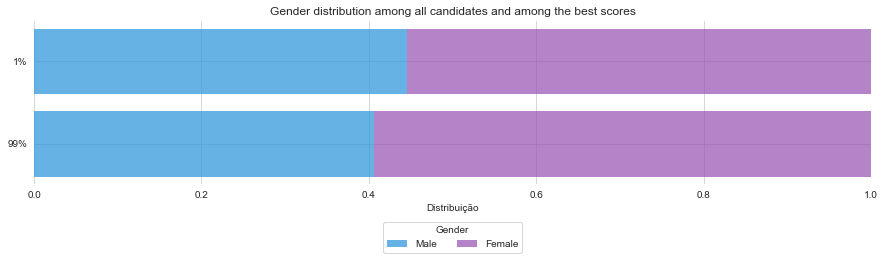

In [64]:
compare_distribution(df_dataviz, 'TP_SEXO', 
                     'Gender distribution among all candidates and among the best scores', 
                     'Gender')

We then see that the **male gender has a greater representation among the 1% best scores** when compared to the rest of the pyramid.

---

Now let's make a **racial cut** and see how the distribution of races behaves.

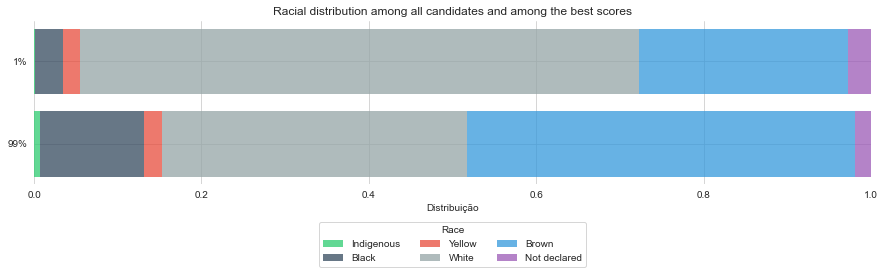

In [65]:
compare_distribution(df_dataviz, 'TP_COR_RACA', 
                     'Racial distribution among all candidates and among the best scores', 
                     'Race')

With this graph, two points stand out:

* The **black, brown and indigenous population are underrepresented** when we analyze mainly the best grades obtained in the data.
* In contrast, the **white population gains notoriety in this same analysis** of the best scores.

---

Finally, we will see **how the parents' level of education can have an impact on these distributions**.

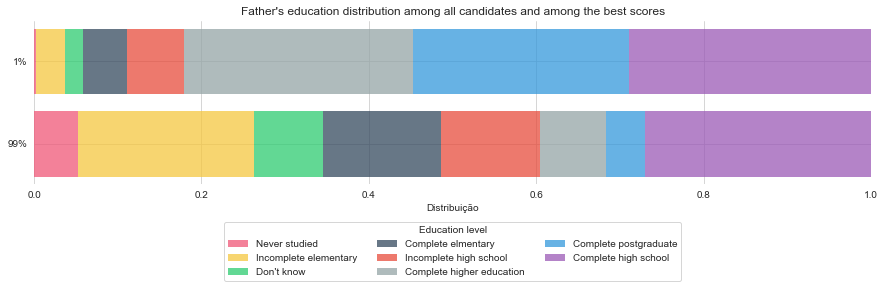

In [66]:
compare_distribution(df_dataviz, 'Q001', 
                     "Father's education distribution among all candidates and among the best scores", 
                     'Education level')

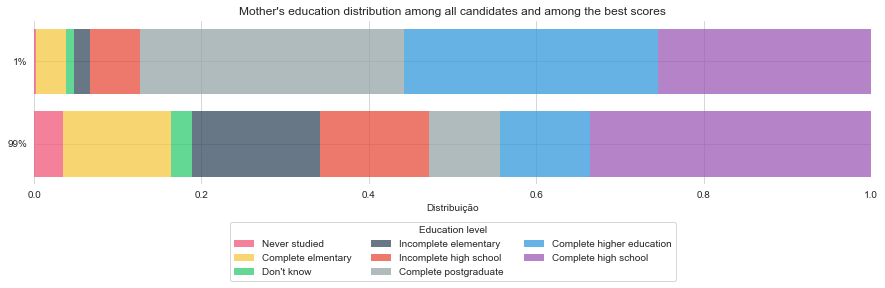

In [67]:
compare_distribution(df_dataviz, 'Q002', 
                     "Mother's education distribution among all candidates and among the best scores", 
                     'Education level')

It is noteworthy that candidates whose father or mother have **higher education** or **postgraduate qualifications** occupy more widely the group of the best grades when compared to the portion of the remaining scores.

---

You must remember when in the data preparation stage we created a special dataset for the purpose of plotting the map of Brazil in the future, right? Well, the time has come! Let's see the average of the scores for each state in the country.

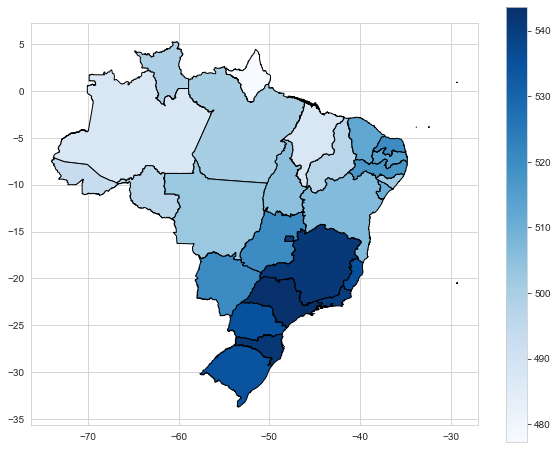

In [68]:
BRAZIL.plot(column = 'NOTA_GERAL',
            cmap='Blues',
            figsize=(10, 8),
            legend=True,
            edgecolor='black')
plt.show()

The **southeastern** and **southern** regions have the highest averages, while the **northern** region have the worst performance.

## Hypothesis Testing

When we want to ask some questions and **interpret the data** more objectively, we use statistical methods that provide **confidence** or **probability** about the answers. To do this, we use statistical hypothesis tests.

A hypothesis test evaluates **two mutually exclusive statements** about a population to determine ***which statement is best supported by the sample data.**

These tests revolve around two types of hypotheses:

- **Null hypothesis (H0)**: Assumption of the test holds and is failed to be rejected at some level of significance.
- **Alternative hypothesis 1 (H1)**: Assumption of the test does not hold and is rejected at some level of significance.

There are several hypothesis tests, many topics, different ways of interpreting and, in order not to make this kernel too massive, I recommend again that, if you wanted to go deeper, take a look at the complementary materials at the bottom of the page. Here, I will introduce just few concepts that will be important to understand what we are doing here, ok?

First of all, **a hypothesis test returns a value that we call p or p-value**. With this value, we can **interpret or quantify the test result**, and thus reject or fail to reject a null hypothesis.

This decision to reject or not is made based on the **level of significance**, commonly identified by alpha. **A common value used for alpha is 5% or 0.05 and iclusive is the one we are going to use here in this kernel**. This value is commonly an agreed value for each type of analysis (eg in the health area, the value is usually 0.01), so **it is not right to change the level of significance** to manipulate the test result, this is called **p-hacking**.

When the p-value is less than or equal to the alpha, we **reject the null hypothesis**, otherwise, we **fail to reject the null hypothesis**. It's important to remember that although common, it is **incorrect** to say that "we accept the null hypothesis". In fact, we simply don't reject it for **lack of evidence**.

There are two classificaitons of staticals tests: **one-tailed test** and **two-tailed test**. One-tailed tests have in the null hypothesis some premise of type **x is greater/less than y**, whereas in two-tailed tests are premises of type **x is equal/different from y**.

* Example of a one-tailed test hypothesis: the average height of men is BIGGER than the average height of women.
* Example of a two-tailed test hypothesis: the average height of men is DIFFERENT than the average height of women.

![](http://www.fao.org/3/X6831E/X6831E120.gif)

Let us now understand a little of this graphic representation above. Well, basically the curve represents some **distribution under H0** (ex: in normality tests, we use the Gaussian distribution) and, from a **formula that varies for each test**, we find a value on the x-axis that will **delimit an area under this curve that means the level of significance**. When we are talking about a **normality test**, this value on the x-axis and the **z-score** and is calculated by a formula, whereas in the **t-test** this value is calculated from another formula and the value is called **t-statistic**. We can also see in this graph if the **p-value** (which is also represented by an area below the curve in that graph) is less than the alpha.

![](https://i.imgur.com/1fN9jmS.png)

---

After this introduction, let's get in practice and a first test that we can perform is a **normality test**, that is, we will check if **our distribution is a Gaussian distribution or not**. A Gaussian distribution is one of the most important continuous distributions and is defined by:

$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right], \quad x\in(-\infty,\infty).$$

One of the factors that make this distribution so special is the fact that **several phenomena in our reality** have a behavior similar to this, among them we can mention the **height** of people. See the image below that compares the standard Gaussian curve with the histogram of adult height.

![](https://i.imgur.com/imHoTTf.png)

One of the tests that we can use to assess the normality of a distribution is the **Shapiro-Wilk test**. This test assesses the **null hypothesis** that a sample has the same distribution as the gaussian distribution. So let's define a simple function that uses the shapiro() from scipy and see the results.

In [69]:
def is_normal(sequence, variable, alpha= 0.01):
    _, pvalue = sct.shapiro(df_dataviz['NU_NOTA_LC'])
    if pvalue > alpha:
        print(f'It is likely that {variable} is normally distributed.')
    else:
        print(f'It is unlikely that {variable} is normally distributed.')

In [70]:
is_normal(df_dataviz['NU_NOTA_LC'], 'NU_NOTA_LC')
is_normal(df_dataviz['NU_NOTA_CH'], 'NU_NOTA_CH')
is_normal(df_dataviz['NU_NOTA_CN'], 'NU_NOTA_CN')
is_normal(df_dataviz['NU_NOTA_MT'], 'NU_NOTA_MT')
is_normal(df_dataviz['NU_NOTA_REDACAO'], 'NU_NOTA_REDACAO')

It is unlikely that NU_NOTA_LC is normally distributed.
It is unlikely that NU_NOTA_CH is normally distributed.
It is unlikely that NU_NOTA_CN is normally distributed.
It is unlikely that NU_NOTA_MT is normally distributed.
It is unlikely that NU_NOTA_REDACAO is normally distributed.


Another very interesting way to analyze the normality of the data is through the **Q-Q plot**. The Q-Q plot is a graph that **compares two probability distributions**, plotting their **quantiles** against each other. To create it quickly, we can use the qqplot function from the StatsModel library.

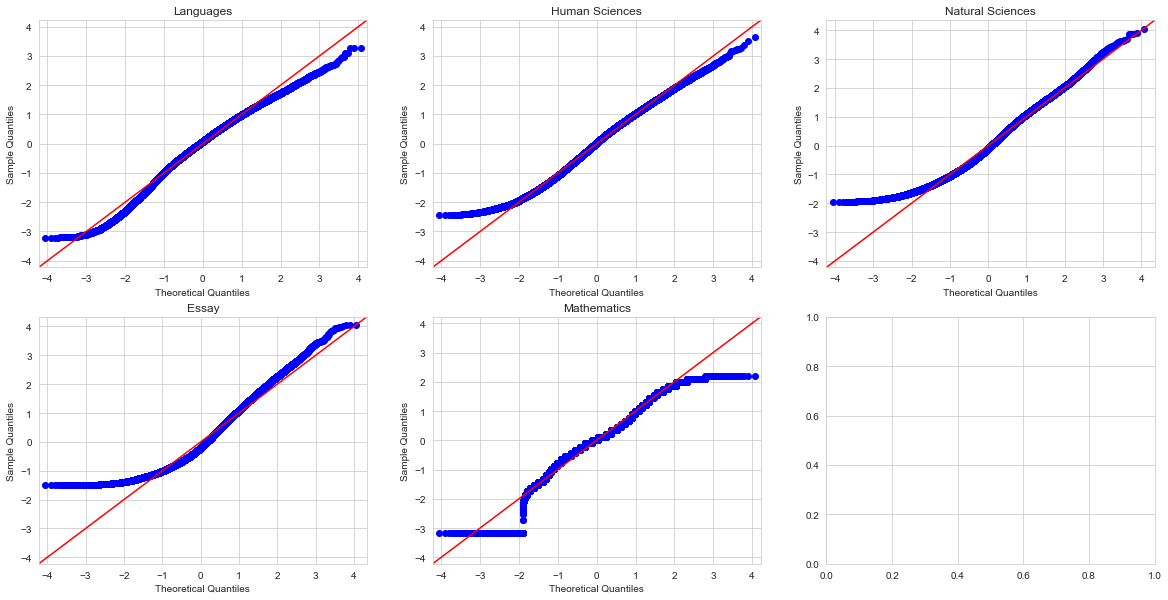

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sm.qqplot(df_dataviz['NU_NOTA_LC'], fit=True, line="45", ax=axes[0, 0]);
sm.qqplot(df_dataviz['NU_NOTA_CH'], fit=True, line="45", ax=axes[0, 1]);
sm.qqplot(df_dataviz['NU_NOTA_CN'], fit=True, line="45", ax=axes[0, 2]);
sm.qqplot(df_dataviz['NU_NOTA_MT'], fit=True, line="45", ax=axes[1, 0]);
sm.qqplot(df_dataviz['NU_NOTA_REDACAO'], fit=True, line="45", ax=axes[1, 1]);

axes[0, 0].set_title('Languages')
axes[0, 1].set_title('Human Sciences')
axes[0, 2].set_title('Natural Sciences')
axes[1, 0].set_title('Essay')
axes[1, 1].set_title('Mathematics')

plt.show()

These graphs may seem confusing at first look but I assure you that it is simple to understand, come with me! Well, **on the X axis we have the theoretical quantiles of a Gaussian distribution** and **on the Y axis the quantiles of our sample**. If the values are the same on both axes, we would have a function of the type **y = x** and, therefore, the graph would be a **45º inclined line**, such as the red ones that are there.

Thus, as in this example we see clearly that **there is no good fit of the points to this line**, we can say that our curve presents **a different pattern than the Gaussian curve**.

Another statistical test that we can do is the **t-test**, which will be used here to determine if **the means of two sets of data are significantly different from each other**. Applying this test to our sample, we can conclude the behavior of these averages for our population.

The t-test have the following hypothesis structure:

* H0: Assumes that **no difference exists** between the means of the two distributions.
* H1: Assumes that **some difference exists** between the means of the two distributions.

A **common misconception** when it comes to the t test is to think that it is **only applied to normal distributions**. But not! **The t test does not assume the normality of the sample, it only assumes that the means of the different ones are normally distributed**.

Imagine a large population from which you could take several samples. By the **central limit theorem**, the means of the means of this population with a finite variance is **close to a normal distribution**, regardless of the population distribution.

Simply put, we say that t-test is **invalid for small samples of non-normal distributions** (normally n <30, where yes we usually only work only with populations of normal distribution), but it is **valid for large samples of non-normal distributions**.

Given that and as we did earlier, let's define a simple function that uses **scipy's ttest_ind function**.

In [72]:
def hypothesis_testing(x, y, alpha=0.05):
    stat, p = sct.ttest_ind(x, y)
    
    if p > alpha:
        print("We can not reject the null hypothesis. In other words, there is not some difference between the means of these distributions.")
    else:
        print("We can reject the null hypothesis. In other words, there is some difference between the means of these distributions.")

**Are the overall score averages equal when comparing 18-year-old candidates to 17-year-old candidates?**

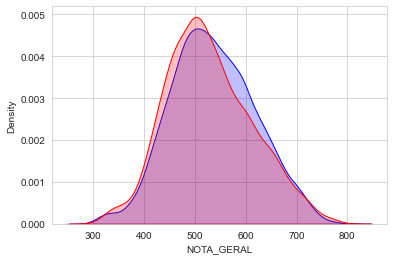

In [73]:
sns.kdeplot(data=df_dataviz.query("NU_IDADE == 17"), x='NOTA_GERAL', color='b', shade=True)
sns.kdeplot(data=df_dataviz.query("NU_IDADE == 18"), x='NOTA_GERAL', color='r', shade=True)
plt.show()

In [74]:
hypothesis_testing(df_dataviz.query("NU_IDADE == 19")['NU_NOTA_REDACAO'],
                   df_dataviz.query("NU_IDADE == 18")['NU_NOTA_REDACAO'])

We can reject the null hypothesis. In other words, there is some difference between the means of these distributions.


**Are the essay score averages equal when comparing male candidates to female candidates?**

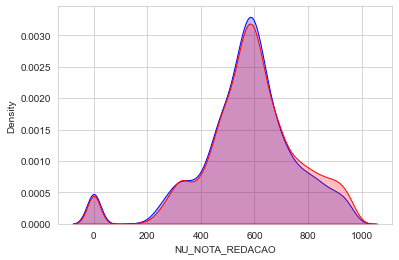

In [75]:
sns.kdeplot(data=df_dataviz.query("TP_SEXO == 'Male'"), x='NU_NOTA_REDACAO', color='b', shade=True)
sns.kdeplot(data=df_dataviz.query("TP_SEXO == 'Female'"), x='NU_NOTA_REDACAO', color='r', shade=True)
plt.show()

In [76]:
hypothesis_testing(df_dataviz.query("TP_SEXO == 'Male'")['NU_NOTA_REDACAO'],
                   df_dataviz.query("TP_SEXO == 'Female'")['NU_NOTA_REDACAO'])

We can reject the null hypothesis. In other words, there is some difference between the means of these distributions.


**Are the math score averages equal when comparing male candidates to female candidates?**

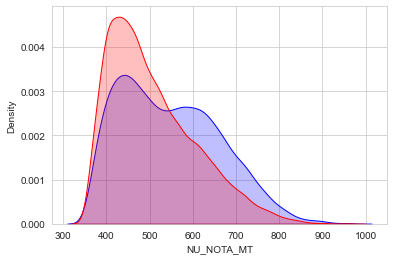

In [77]:
sns.kdeplot(data=df_dataviz.query("TP_SEXO == 'Male'"), x='NU_NOTA_MT', color='b', shade=True)
sns.kdeplot(data=df_dataviz.query("TP_SEXO == 'Female'"), x='NU_NOTA_MT', color='r', shade=True)
plt.show()

In [78]:
hypothesis_testing(df_dataviz.query("TP_SEXO == 'Male'")['NU_NOTA_MT'],
                   df_dataviz.query("TP_SEXO == 'Female'")['NU_NOTA_MT'])

We can reject the null hypothesis. In other words, there is some difference between the means of these distributions.


**Are the overall score averages equal when comparing white candidates to black candidates?**

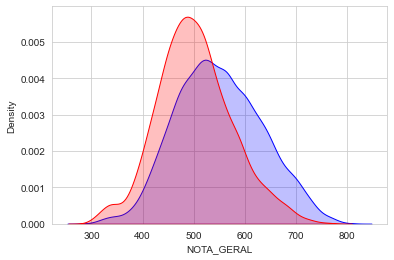

In [79]:
sns.kdeplot(data=df_dataviz.query("TP_COR_RACA == 'White'"), x='NOTA_GERAL', color='b', shade=True)
sns.kdeplot(data=df_dataviz.query("TP_COR_RACA == 'Black'"), x='NOTA_GERAL', color='r', shade=True)
plt.show()

In [80]:
hypothesis_testing(df_dataviz.query("TP_COR_RACA == 'White'")['NOTA_GERAL'],
                   df_dataviz.query("TP_COR_RACA == 'Black'")['NOTA_GERAL'])

We can reject the null hypothesis. In other words, there is some difference between the means of these distributions.


## Machine Learning Modeling and Evaluating

We now arrive at the modeling stage: this is where we will define which model will be used in our application. There are several approaches to be taken here, from the simplest ones with a linear regression model to solutions that touch the state of the art in the field of machine learning.

In case you noticed, at the beginning of the notebook we import a module called **PyCaret**. We will use it to facilitate this testing process between different types of algorithms.

**PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.**

The library in question brings the **AutoML approach**, which is the process of **automating the process of applying machine learning to real-world problems**. AutoML covers the **complete pipeline** from the raw dataset to the deployable machine learning model. AutoML was proposed as an artificial intelligence-based solution to the ever-growing challenge of applying machine learning.

The main advantage of using this approach here is that **PyCaret can train and test 20 different types of regression models**. As the function to be mapped that relates the data set to the variable to be estimated has relatively low complexity, it is very likely that one of these models will be able to perform very well in our case.

After this brief explanation, let's **initialize the environment in pycaret**.

In [54]:
caret_df = setup(data = subset, 
                 target = 'SOMA_NOTAS_OBJ', 
                 session_id = 777)

,Description,Value
0,session_id,777
1,Target,SOMA_NOTAS_OBJ
2,Original Data,"(40970, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(28678, 4)"


Now, we can just call the function **compare_models()** and and wait for the magic to happen.

In [55]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,48.3943,3860.7365,62.1234,0.9508,0.0325,0.0249,3.7510
lightgbm,Light Gradient Boosting Machine,49.0257,3945.6119,62.8023,0.9498,0.0328,0.0251,0.0470
gbr,Gradient Boosting Regressor,49.5940,4024.9429,63.4338,0.9488,0.0330,0.0254,0.1580
xgboost,Extreme Gradient Boosting,49.8958,4089.9522,63.9398,0.9479,0.0334,0.0256,0.5170
knn,K Neighbors Regressor,53.2468,4667.8732,68.3107,0.9406,0.0356,0.0273,0.0240
rf,Random Forest Regressor,54.6065,4922.9215,70.1528,0.9373,0.0367,0.0280,0.3690
en,Elastic Net,56.6703,4971.2333,70.5000,0.9367,0.0359,0.0286,0.0070
huber,Huber Regressor,56.5832,4974.3815,70.5215,0.9367,0.0358,0.0285,0.0440
br,Bayesian Ridge,56.6234,4968.9540,70.4836,0.9367,0.0359,0.0285,0.0100
ridge,Ridge Regression,56.6234,4968.9539,70.4836,0.9367,0.0359,0.0285,0.0110


As we can see, the **CatBoost Regressor got the best performance** among the others. Before taking the next step, it is important to **understand how CatBoost actually works**. So, let's take a look: 

As the name suggests, CatBoost is an open source **Gradient Boosting** library in decision trees, which has gained a lot of notoriety because it allows to achieve great results even with **categorical variables** within the data set. Here in our case all variables are continuous, but we still managed to take advantage of the Boost that makes up the model name and that is why the results achieved were so good.

Before get into how Gradient Boosting really works, **let's understand about Decision Trees and how we can use them in regression tasks.** 

**Decisions tree learning is one of the predictive modelling approaches** used in statistics, data mining and machine learning. It uses a decision tree as a predictive model to **go from observations about an item to conclusions about the item's target value**. This approach can be used in **classification** (Classification Tree) and in **regression tasks** (Regression Tree).

The **strucuture of a tree** can be described using some main concepts:

* **Root**: the highest node of the tree; 
* **Edge**: the link between two nodes; 
* **Leaf**: a node without child nodes in the tree; 
* **Parent**: a node with an edge to a child node;
* **Subtree**: a cut of the original tree so that there is also a root.
* **Height**: the length of the longest path to the leaf.

![](https://i.imgur.com/2OwRum2.png)
  
I wont get too deep into mathematics concepts of the implementation of a decision tree learning algorithm but **think that by using some rules and mathematical equations we can calculate automatically some thresholds and use them as nodes of a tree**. At the end, in the leafs, we have different values that will be the possibilities of prediction of our tree. Check the following example of a Regression Tree:

![](https://i.imgur.com/NkbuTuX.png)

Given the above, it is easy to apply the boosting technique. Basically, what we do is **build trees one at a time, where each new tree helps to correct errors made by previously trained tree**. Since boost trees are derived by performing optimization in the function space, they can basically be used to **map almost all objective functions**.

![](https://i.imgur.com/lz3doHx.png)

Well, I think this is enough for a first look. Of course, CatBoost has several other things that could be addressed here, such as the different methodology they use to **avoid overfitting** the model, or to talk more deeply about the **parameters** existing in this algorithm, etc. If you want to go deeper into this field of study, I recommend taking a look at the end of the notebook in the section of **references and complementary content**.

Now, in order to try to **achieve a even better level of performance**, let's now **fine-tune** the model.

In [56]:
cat_reg = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.1886,3795.9714,61.6115,0.9531,0.0322,0.0247
1,48.8584,3959.0454,62.9209,0.9496,0.0328,0.0251
2,47.1492,3694.4025,60.7816,0.9525,0.0318,0.0242
3,48.2288,3877.0834,62.2662,0.9503,0.0327,0.0248
4,48.2126,3836.1459,61.9366,0.9502,0.0325,0.0249
5,46.7987,3577.4620,59.8119,0.9535,0.0312,0.0240
6,48.5935,3856.9366,62.1042,0.9505,0.0325,0.0250
7,49.2985,4018.6043,63.3925,0.9506,0.0332,0.0253
8,50.0326,4127.1369,64.2428,0.9485,0.0337,0.0257
9,48.5824,3864.5771,62.1657,0.9497,0.0325,0.0249


In [57]:
tuned_cat = tune_model(cat_reg)
print(tuned_cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.4777,3819.6093,61.8030,0.9528,0.0322,0.0248
1,48.7515,3922.3355,62.6286,0.9500,0.0326,0.0250
2,47.0555,3675.4697,60.6257,0.9528,0.0317,0.0242
3,48.2555,3859.3527,62.1237,0.9505,0.0325,0.0248
4,48.2452,3824.1986,61.8401,0.9504,0.0324,0.0249
5,46.8423,3585.7681,59.8813,0.9534,0.0312,0.0240
6,48.7808,3878.7334,62.2795,0.9502,0.0325,0.0250
7,49.3278,3995.5125,63.2101,0.9509,0.0330,0.0253
8,50.0897,4092.7097,63.9743,0.9489,0.0335,0.0257
9,48.4663,3806.3945,61.6960,0.9504,0.0322,0.0248


Given this improved model, a good thing to do is to **understand a little more about these metrics** reported by PyCaret for regression. Below you will find a mathematical explanation of them:

**MAE (Mean Absolute Error):** 

In statistics, mean absolute error (MAE) is a measure of **errors between paired observations expressing the same phenomenon**. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:

$$
\begin{align}
\text{MAE} = \frac{1}{n} \sum_{i=1}^n | y_i - \hat y_i | 
\end{align}
$$

The main advantage of using the MAE over the other metrics is because it is much easier to explain.

**MSE (Mean Squared Error):**

In statistics, the mean squared error (MSE) measures the **average of the squares of the errors** — that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. MSE is calculated as: 

$$
\begin{align}
\text{MSE} = \frac{1}{n} \sum_{i=1}^n ( y_i - \hat y_i )^2 
\end{align}
$$

There is some advantages in using MSE as metric: the simplest one is because **MSE is easier to differenciate** when we compare with MAE - making it easier to implement as loss function in the otimization algorithm. Another cool thing is that The MSE incorporates both the **variance** of the estimator (how widely spread the estimates are from one data sample to another) and its **bias** (how far off the average estimated value is from the true value). Therefore, we can also write $\text{MSE}(\hat \theta) = E_\theta \text{Var}_\theta (\hat \theta) + \text{Bias}(\hat \theta, \theta)^2 $.

**RMSE (Root Mean Squared Error):**

The root-mean-square error (RMSE) is a frequently used measure of the differences between values) predicted by a model or an estimator and the values observed. The RMSE represents the **square root of the second sample moment of the differences between predicted values and observed values** or the quadratic mean of these differences. These deviations are called **residuals** when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample.

$$
\begin{align}
\text{RMSE} =  \sqrt{\sum_{i=1}^{n}{\frac{( y_i - \hat y_i )^2}{n}}}
\end{align}
$$

One of the pros of using RMSE as an evaluation metric is that, since errors are squared before being calculated, RMSE places a relatively high weight on **large errors**. So, if you want that your model penalize these big mistakes, you should use that metric as a loss function.

**R2 (R-squared):**

In statistics, R2 (also called R-squared and coefficient of determination) is the **proportion of the variance in the dependent variable that is predictable from the independent variable(s)**. I commonly find people that have some missconcepts about R2 and because it i will take care at this explanation. The R2 can be defined as:
$$
\begin{align}
\text{R}^2 = 1- \frac{SS_{res}}{SS_{tot}} 
\end{align}
$$

* In this formula, $SS_{tot} = \sum_i (y_i - \bar y_i)^2$ and it's the total sum of squares. 
* In turn, $SS_{res} = \sum_i(y_i - \hat h_i)^2$ and it's the sum of squares of residuals. 

Pay attention that in the first one we subtract the **mean of the observed data** ($ \bar y_i $) and in the second one we subtract the **predicted value** by our esitmator ($\hat y_i$).

Now focusing on the main misconcepts in my opnion: 
1. **"R2 indicates that there is a causal relationship between the independent variables and the target one."** 
    
    This statement is false for a simple reason: R-squared is a correlation measure. Always remember, correlation is not causation.
    
    
2. **"R2 is very large, so the chosen regression model is good."** 
    
    There is another myth, the determination coefficient is calculated from the sample data (which are used to generate the model), so it makes no sense to consider it as a metric for model validation. If you want something in that sense that uses R2, you can work together with the ANOVA table, it will help you to establish this desired relationship. 


The RMLSE and MAPE are good metrics for evaluation but are not commonly used. So, in order not to go into this stage unnecessarily, I will choose not to detail how they work.

Another cool way to evaluate the model perfomance is by using the **residual plot**. Residuals, in the context of regression models, are the **difference between the observed value of the target variable (y) and the predicted value (ŷ)**, i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to **detect regions within the target that may be susceptible to more or less error**.

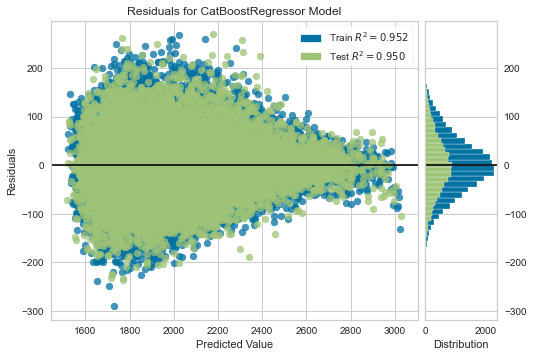

In [58]:
plot_model(tuned_cat, plot = 'residuals')

In the previous image, we can see that we have a similar behavior in the training set and in the test set: **low variance between the high scores that tends to increase as the score falls.**

This behavior is **completely normal in this case** due to the Index Response Theory, which can penalize or value an individual's score due to the question of coherence of responses, enabling people with the same number of hits to have very different grades. Remember the graph generated earlier about the scoring ranges in relation to the number of correct answers in each knowledge area

## Interpreting the model

Yes, I know, the previous metrics and graphs are beautiful, they tell us a lot about our model, etc. However, this type of information is too good to be used internally by the data science team. **To communicate to a manager, or to a larger audience that simply does not have prior knowledge on the subject, we say that our model has RMSE = 62.5 and R-2 = 0.95 does not add much value and does not explain much about what actually happens.**

In order to circumvent these problems, there is a huge effort in the construction of techniques that facilitate the explainability of the results. One of them is **SHAP (Shapley Additive exPlanations)**, it is what we will address and use here.

SHAP is a **game-theoretic approach** to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the **classic Shapley values** from game theory and their related extensions. 

In order to take a brief and intuitive look at the Shapely values from game theory, let's suppose a scenario where some friends Wesley, Lucas, Matheus, Hael, and Weybson want to **rent an apartment** and for that they will also have to **pay the common expenses** (internet, water, electricity, etc.). However, they think that due to the **different form and quantity** that they use these services **it is not fair that they share the bill equally**.

Given that, **what is the fairest way to separate the account between all friends?** To analyze this, we must consider what the fare would be for **each subset of friends** (only Wesley, only Matheus and Weybson, all together, etc) and look at the **marginal contribution** to the cost when each friend joins to each possible subset. Here, according to Shapely, **the fairest contribution for each friend is their average marginal contribution over all these sets.**

Now, you may be wondering **"well, but how this can be applied in Machine Learning?"** It's easy: think of the features as if they were friends from the previous example. Citting the [original paper](https://arxiv.org/pdf/1705.07874.pdf), "SHAP values attribute to each feature the **change in the expected model prediction** when conditioning on that feature. They explain **how to get from the base value** $ E[f(z)] $ that would be predicted if we did not know any features **to the current output** $f(x)$."

If we create an estimator for the supra cited example, we have to analyze how, for example, did Matheus's contribution to the rent went from a base value (here  $ E[f(z)] = \text{R\$ 400}$) to the predicted one ($\text{R\$ 730}$).

![](https://i.imgur.com/iv3UuaD.png)

Using SHAP we can see how much each feature impacted on the base value: 

![](https://i.imgur.com/0BeeSJv.png)

Realize that this diagram shows a **single ordering**. When the model is non-linear or the input features are not independent, however, the order in which features are added to the expectation matters, and the SHAP values arise from **averaging** the φi values across all possible orderings.

Thus, let's plot this representation for an example predicted by our estimator. To do it, we can use the function **interpret_model()** and pass ```plot='reason'``` as parameter.

In [72]:
interpret_model(tuned_cat, plot = 'reason', observation=777)

As we can see, the number of correct answers in the languages test (ACERTOS_LC), in the human science test (ACERTOS_CH) and in the natural science test (ACERTOS_CN) was responsible for **bringing the predicted value above the base value** (which is here the average of the training set values). On the other hand, the number of correct answers in the math test (ACERTOS_MT) had a **negative impact on the result**.

Another way to visualize the results of the SHAP is with a graph that I think is much more interesting.  Here we can see in kind of a **macro aspect** the **influence of each feature on the model output**.  To plot this graph, we can again call the function interpret_model(), but with **no parameters**.

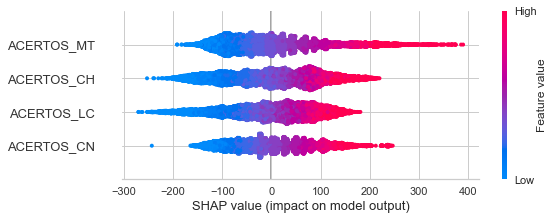

In [60]:
interpret_model(tuned_cat)

In addition to the primary analysis that the greater the value of the correct answer features, the better the impact on the model's output, a much more important thing that shines the eyes is the fact that **the math and natural science tests have a wider range of impact positive than the others**. This insight is directly linked to what we had in the exploratory data analysis part about the range of scores in each knowledge area and shows that in fact this is a determining factor for achieving good scores. In other words, if you are going to take the ENEM, I suggest giving a more firm study in these two areas :)

Now, let's **save the model** and our job is finally done! The next steps would be to use all the insights that we have in this kernel to present to the board of the company and, with due approval, deploy the model online and help the students.

In [61]:
save_model(tuned_cat, 'model/enem_predictor')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='SOMA_NOTAS_OBJ',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='SOMA_NOTAS_OBJ')),
                 ('fix_perfect', Remove_100(target='SOMA_NOTAS_OBJ')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', '

## Thank you! 

And now, in fact, we have come to an end. Here, as promised at the beginning of the notebook, we visited the important concepts that are essential for the development of data science projects.

- ✅ **Problem understanding**
- ✅ **Sampling**
- ✅ **Data wrangling**  
- ✅ **Data visualization**
- ✅ **Hypothesis tests**
- ✅ **AutoML with PyCaret**                 
- ✅ **CatBoost algorithm**                    
- ✅ **Evaluation metrics for regression**   
- ✅ **Interpretability with SHAP**  

Of course, we could still continue to work on this project: plot more charts, work deeply with PyCaret. However, for the chosen objective I think that what we have seen so far is enough.

Thanks for reading. If you want to get in touch, send me an email or a message on LinkedIn.

[![Gmail: Wesley](https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white&link=mailto:was4@cin.ufpe.br)](mailto:was4@cin.ufpe.br)  

[![Linkedin: Wesley](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/w-alves/)](https://www.linkedin.com/in/w-alves/)

Made with ❤️ by Wesley Alves.

## References and complementary content

[ENEM and IRT](http://download.inep.gov.br/educacao_basica/enem/guia_participante/2013/guia_do_participante_notas.pdf)

[Sampling](https://en.wikipedia.org/wiki/Sampling_(statistics))

[Pandas](https://pandas.pydata.org/), [PyCaret](https://pycaret.org/), [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)

[Goodman, Steven. (2008). A Dirty Dozen: Twelve P-Value Misconceptions](https://www.perfendo.org/docs/BayesProbability/twelvePvaluemisconceptions.pdf)

[(Unpingco, José. (2016). Python for Probability, Statistics, and Machine Learning](https://www.springer.com/gp/book/9783030185442)

[StatQuest: Decision Trees](https://www.youtube.com/watch?v=7VeUPuFGJHk)

[CatBoost - the new generation of gradient boosting - Anna Veronika Dorogush](https://www.youtube.com/watch?v=8o0e-r0B5xQ)

[Colton, James & Bower, Keith M.. (2002). Some Misconceptions About R-Square. 3.](https://www.researchgate.net/publication/268029338_Some_Misconceptions_About_R-Square)

[AI Simplified: SHAP Values in Machine Learning](https://www.youtube.com/watch?v=Tg8aPwPPJ9c)

[The Science Behind InterpretML: SHAP](https://www.youtube.com/watch?v=-taOhqkiuIo)

[Lundberg, Scott & Lee, Su-In. (2017). A Unified Approach to Interpreting Model Predictions.](https://www.researchgate.net/publication/317062430_A_Unified_Approach_to_Interpreting_Model_Predictions)


